<a href="https://colab.research.google.com/github/rtp-robinson/Curso_Innovacion/blob/main/MINIST_Digit_Clasification_FUNCIONABLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.8257142857142857
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1732
           1       0.87      0.93      0.90      1875
           2       0.88      0.84      0.86      1782
           3       0.79      0.81      0.80      1711
           4       0.85      0.75      0.80      1705
           5       0.85      0.65      0.74      1586
           6       0.88      0.91      0.89      1716
           7       0.94      0.83      0.88      1805
           8       0.65      0.77      0.71      1766
           9       0.71      0.84      0.77      1822

    accuracy                           0.83     17500
   macro avg       0.83      0.82      0.83     17500
weighted avg       0.83      0.83      0.83     17500



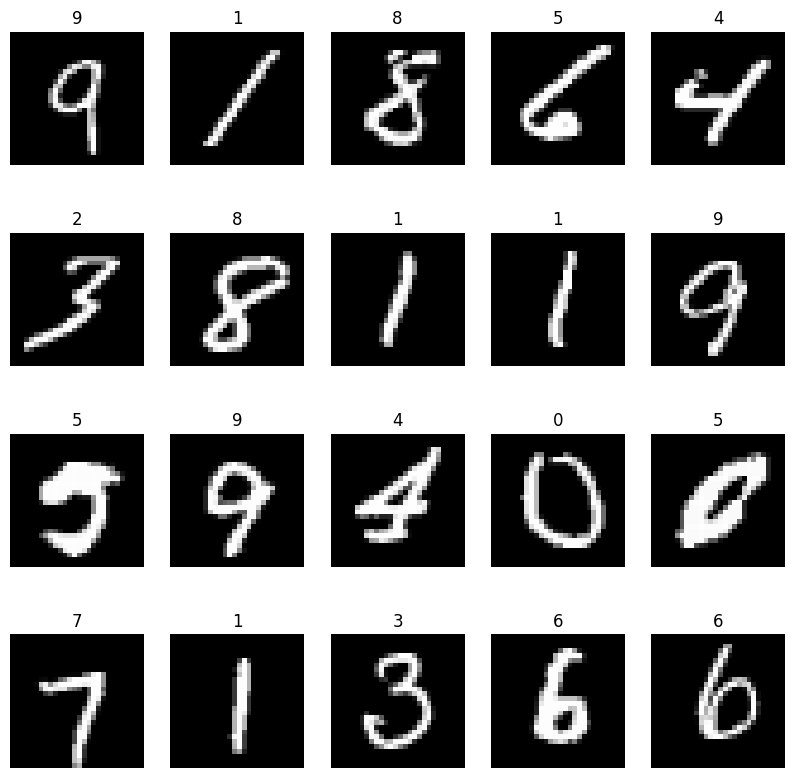

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml


# Cargar datos MNIST desde OpenML
mnist = fetch_openml('mnist_784', version=1, as_frame=False) # as_frame=False - Nos da numpy arrays en lugar de dataframes
x = mnist['data'] #Imágenes aplanadas en vectores de 784 píxeles (28×28)
y = mnist['target'].astype('int32')  # Convertir etiquetas a enteros

# Normalizar imágenes
x = x / 255.0


from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25)

# Entrenar clasificador Naive Bayes
from sklearn.naive_bayes import MultinomialNB
cls = MultinomialNB()
cls.fit(train_x, train_y)
#El clasificador asume que cada píxel es una característica independiente, lo que no es del todo realista, pero igual funciona bien.

# Evaluación del modelo
accuracy = cls.score(test_x, test_y)
print("Accuracy:", accuracy)



# Reporte de clasificación
from sklearn.metrics import classification_report
predictions = cls.predict(test_x)
print(classification_report(test_y, predictions))


# Función para mostrar imágenes
def plot_images(images, labels):
    n_cols = min(5, len(images))
    n_rows = int(np.ceil(len(images) / n_cols))
    fig = plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        sp = fig.add_subplot(n_rows, n_cols, i + 1)
        sp.axis('off')
        sp.imshow(images[i], cmap=plt.cm.gray)
        sp.set_title(str(labels[i]))
    plt.show()

p = np.random.permutation(len(test_x))[:20]
plot_images(test_x[p].reshape(-1, 28, 28), predictions[p])